## 1. Setup and Load Data

##### 1.1 Install Imports and Dependencies

In [1224]:
# for import the TensorFlow library and make it as tf 
import matplotlib.pyplot as plt
import numpy as np 
import PIL
import tensorflow as tf
import cv2
# open source computer vision library and used for images and videos 
# for machine learning 
from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from pathlib import Path


In [1225]:
# just for check the version of TensorFlow
# just for check the OpenCV Version 
print("TensorFlow version:", tf.__version__)
print("OpenCV version:", cv2.__version__)

TensorFlow version: 2.18.0
OpenCV version: 4.10.0


In [1226]:
!pip list

Package                   Version
------------------------- --------------
absl-py                   2.1.0
altair                    5.4.1
anyio                     4.5.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
astunparse                1.6.3
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.1.0
blinker                   1.8.2
cachetools                5.5.0
certifi                   2024.8.30
cffi                      1.17.1
charset-normalizer        3.3.2
click                     8.1.7
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.3.0
cycler                    0.12.1
debugpy                   1.8.5
decorator                 5.1.1
defusedxml                0.7.1
dlib                      19.24.6
executing                 2.1.0
face-recognition

In [1227]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [1228]:
import os
import pathlib

In [1229]:
data_dir = Path('Potato Pest Dataset')
data_dir = pathlib.Path(data_dir).with_suffix('')
folders = os.listdir(data_dir)
print(folders)

['.DS_Store', 'SL01 Agrotis ipsilon (Hufnagel)', 'SL02 Amrasca devastans (Distant)', 'SL03 Aphis gossypii Glover', 'SL05 Bemisia tabaci (Gennadius)', 'SL06 Brachytrypes portentosus Lichtenstein', 'SL10 Epilachna vigintioctopunctata (Fabricius)', 'SL15 Myzus persicae (Sulzer)', 'SL17 Phthorimaea operculella (Zeller)']


In [1230]:
# extended list for the image 
image_count = len(list(data_dir.glob('*/*.jpg'))) + len(list(data_dir.glob('*/*.jpeg'))) + len(list(data_dir.glob('*/*.bmp'))) + len(list(data_dir.glob('*/*.png')))
print(image_count)

494


In [1231]:
# Find the folder you want (e.g., 'SL06 Brachytrypes portentosus Lichtenstein')
folder_path = data_dir / 'SL06 Brachytrypes portentosus Lichtenstein'

In [1232]:
# for allocation in TensorFlow ensure efficient use for system during training or inference 
# Avoid OOM errors by setting GPU Memory Consumption Growth when bulid a model for tensorflow 
# going to use limited memory 
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [1233]:
# Get a list of image files inside the 'SL06' folder
image_files = list(folder_path.glob('*'))  # Adjust if you're only looking for specific file types (e.g., *.jpg)

In [1234]:
import PIL.Image

# try to know one of the image 
image = PIL.Image.open(str(image_files[1]))
image.show()

##### 1.2 Remove dodgy images 

In [1235]:
import imghdr
from matplotlib import pyplot as plt 

In [1236]:
# command for return all the image inside folder of SL15 Myus Persicae Sulzer
os.listdir(os.path.join(data_dir, 'SL15 Myzus persicae (Sulzer)'))

['Myzus persicae (Sulzer)_1.jpg',
 'Myzus persicae (Sulzer)_10.jpg',
 'Myzus persicae (Sulzer)_11.jpg',
 'Myzus persicae (Sulzer)_12.jpg',
 'Myzus persicae (Sulzer)_13.jpg',
 'Myzus persicae (Sulzer)_14.jpg',
 'Myzus persicae (Sulzer)_15.jpg',
 'Myzus persicae (Sulzer)_16.jpg',
 'Myzus persicae (Sulzer)_17.jpg',
 'Myzus persicae (Sulzer)_18.jpg',
 'Myzus persicae (Sulzer)_19.jpg',
 'Myzus persicae (Sulzer)_2.jpg',
 'Myzus persicae (Sulzer)_20.jpg',
 'Myzus persicae (Sulzer)_21.jpg',
 'Myzus persicae (Sulzer)_22.jpg',
 'Myzus persicae (Sulzer)_23.jpg',
 'Myzus persicae (Sulzer)_24.jpg',
 'Myzus persicae (Sulzer)_25.jpg',
 'Myzus persicae (Sulzer)_26.jpg',
 'Myzus persicae (Sulzer)_27.jpg',
 'Myzus persicae (Sulzer)_28.jpg',
 'Myzus persicae (Sulzer)_29.jpg',
 'Myzus persicae (Sulzer)_3.jpg',
 'Myzus persicae (Sulzer)_30.jpg',
 'Myzus persicae (Sulzer)_31.jpg',
 'Myzus persicae (Sulzer)_32.jpg',
 'Myzus persicae (Sulzer)_33.jpg',
 'Myzus persicae (Sulzer)_34.jpg',
 'Myzus persicae (Sulze

In [1237]:
for image_class in os.listdir(data_dir):
    class_path = os.path.join(data_dir, image_class)
    # check if the path is a directory 
    if os.path.isdir(class_path): 
        for image in os.listdir(class_path):
            image_path = os.path.join(image_class, image)
        try:
            # if there is no valid image extension, will remove by os.remove
            # this code will give the pixel output 
            # read the image 
            img = cv2.imread(image_path)
            # end of the code command 
            # extensions of image
            tip = imghdr.what(image_path)
            if tip not in image_count:
                print(f'Image not in ext list: {image_path}')
                os.remove(image_path)
            # ENDDD
        except Exception as e:
            print(f'Issue with image: {image_path}')

Issue with image: SL01 Agrotis ipsilon (Hufnagel)\Agrotis ipsilon (Hufnagel)_99.jpg
Issue with image: SL02 Amrasca devastans (Distant)\Amrasca devastans (Distant)_9.jpg
Issue with image: SL03 Aphis gossypii Glover\aphid9.jpg
Issue with image: SL05 Bemisia tabaci (Gennadius)\Bemisia tabaci (Gennadius)_9.jpg
Issue with image: SL06 Brachytrypes portentosus Lichtenstein\Brachytrypes portentosus Lichtenstein_9.jpg
Issue with image: SL10 Epilachna vigintioctopunctata (Fabricius)\Epilachna vigintioctopunctata (Fabricius)_9.jpg
Issue with image: SL15 Myzus persicae (Sulzer)\Myzus persicae (Sulzer)_9.jpg
Issue with image: SL17 Phthorimaea operculella (Zeller)\Phthorimaea operculella (Zeller)_9.jpg


In [1238]:
import numpy as np 
from matplotlib import pyplot as plt 
from tensorflow import keras 

#### 1.3 Create a dataset

In [1239]:
batch_size = 32 
img_height = 180
img_width = 180 

##### Training Dataset

In [1240]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir, 
    validation_split=0.2, 
    subset="training", 
    # seed for shuffled the dataset and allocated with the same quantity size
    seed=123, 
    image_size = (img_height, img_width), 
    batch_size=batch_size
)

Found 494 files belonging to 8 classes.
Using 396 files for training.


##### Validation Dataset

In [1241]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir, 
    validation_split=0.5,
    subset="validation", 
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 494 files belonging to 8 classes.
Using 247 files for validation.


In [1242]:
class_names = train_ds.class_names
print(class_names)

['SL01 Agrotis ipsilon (Hufnagel)', 'SL02 Amrasca devastans (Distant)', 'SL03 Aphis gossypii Glover', 'SL05 Bemisia tabaci (Gennadius)', 'SL06 Brachytrypes portentosus Lichtenstein', 'SL10 Epilachna vigintioctopunctata (Fabricius)', 'SL15 Myzus persicae (Sulzer)', 'SL17 Phthorimaea operculella (Zeller)']


#### 1.5 Visualize the data 

In [1243]:
import matplotlib.pyplot as plt
import textwrap

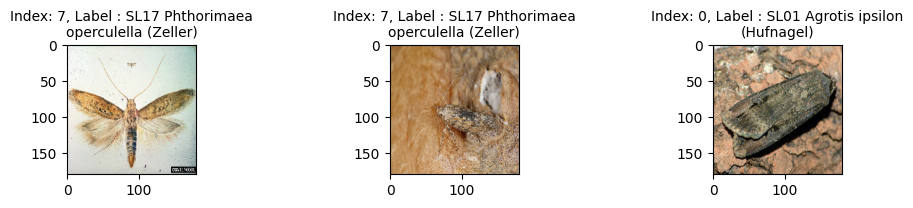

In [1244]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))

    # wrap label of the class 
    wrapped_label = "\n".join(textwrap.wrap(class_names[labels[i]], width=20))
    # to see how the index in each label have the same result or no with the automaticly label 
    plt.title(f"Index: {labels[i].numpy()}, Label : {wrapped_label}", fontsize=10)
    plt.axis("on")

# space between subplots 
plt.subplots_adjust(wspace=1.5, hspace=0.5)
plt.show()

In [1245]:
for image_batch, labels_batch in train_ds: 
    print(image_batch.shape)
    print(labels_batch.shape)
    break

# output the image_batch.shape there is 4, because 32 is image_size, 180 is height and weight
# last number 3 is RGB color 
# output for label_batch.shape just one, because label just 0,1,2,and any else 

(32, 180, 180, 3)
(32,)


## 2. Standardize the data 

##### 2.1 Scale data/image

In [1246]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [1247]:
normalized_dataset = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_dataset))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.89294034


## 3. Configure the dataset for performance 

In [1248]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## 4. Train a Model 

In [1249]:
num_classes = len(class_names)
print(num_classes)

8


In [1250]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(48, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes)
])

In [1251]:
model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    metrics=['accuracy']
)


In [ ]:
epochs = 15

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 219ms/step - accuracy: 0.2216 - loss: 2.1042 - val_accuracy: 0.3077 - val_loss: 1.9208
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 193ms/step - accuracy: 0.3226 - loss: 1.8889 - val_accuracy: 0.4049 - val_loss: 1.7009
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 205ms/step - accuracy: 0.4174 - loss: 1.6874 - val_accuracy: 0.4494 - val_loss: 1.5075
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 214ms/step - accuracy: 0.4681 - loss: 1.5135 - val_accuracy: 0.5020 - val_loss: 1.4761
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 0.5178 - loss: 1.3828 - val_accuracy: 0.6194 - val_loss: 1.2312
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 187ms/step - accuracy: 0.5888 - loss: 1.2334 - val_accuracy: 0.5951 - val_loss: 1.1003
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 186ms/step - accuracy: 0.5838 - loss: 1.1141 - val_accuracy: 0.6478 - val_loss: 1.0108
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 159ms/step - accuracy: 0.6372 - loss: 1.0601 - val_accuracy: 0.

In [1253]:
# check summary 
model.summary()

Model: "sequential_128"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_129 (Rescaling)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_308 (Conv2D)             │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_307               │ (None, 89, 89, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_309 (Conv2D)             │ (None, 87, 87, 48)     │        13,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_308               │ (None, 43, 43, 48)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_310 (Conv2D)             │ (None, 41, 41, 32)     │        13,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_309               │ (None, 20, 20, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_99 (Flatten)            │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_165 (Dense)               │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_95 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_166 (Dense)               │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,004,554 (19.09 MB)

 Trainable params: 1,668,184 (6.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,336,370 (12.73 MB)

##### 4.1 Visualize training results 

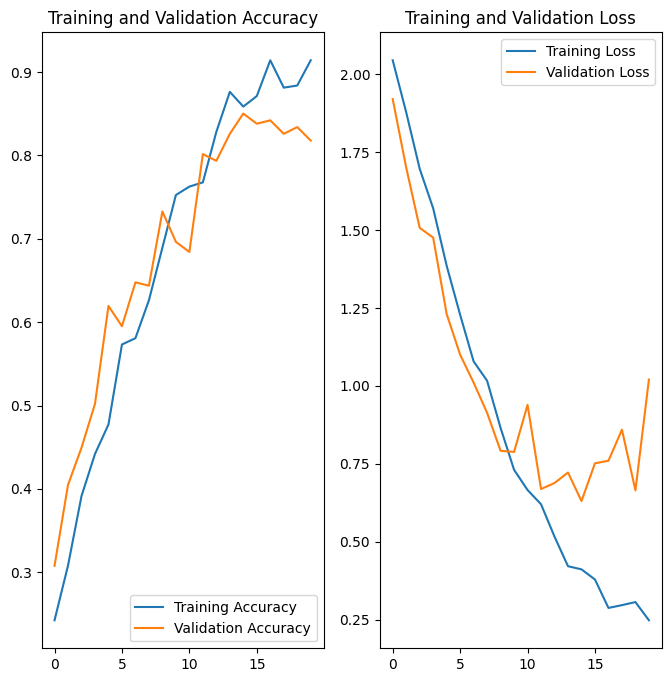

In [1254]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 5. Data Augmentation

In [1255]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal', input_shape =(img_height, img_width, 3)), 
    layers.RandomRotation(0.1), 
    layers.RandomZoom(0.1)
])

c:\Users\steve\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


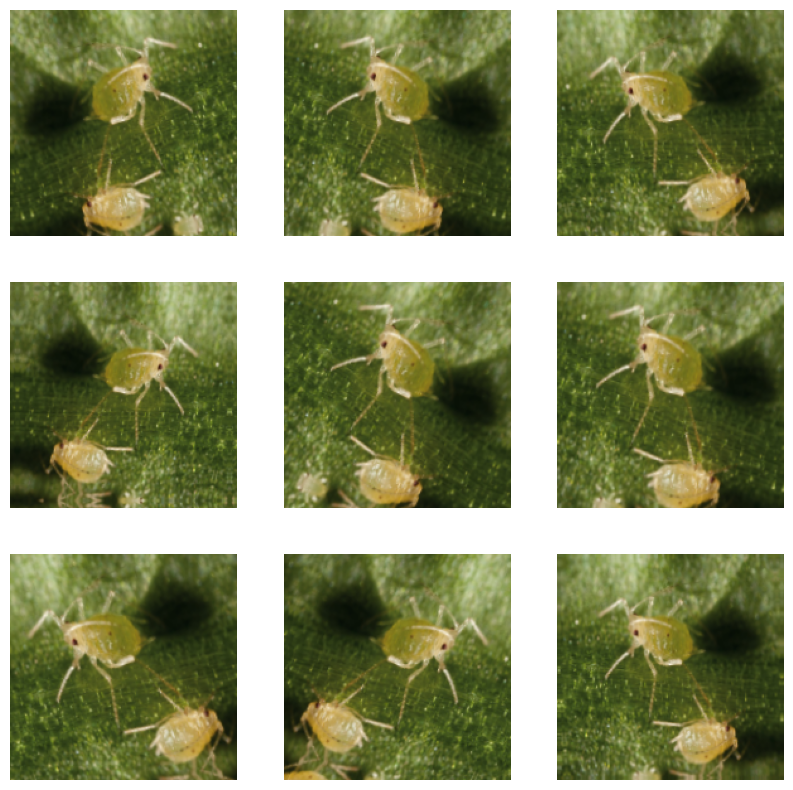

In [1256]:
plt.figure(figsize=(10,10))
for images, _ in train_ds.take(1): 
    for i in range(9): 
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3,3, i+1)
        plt.imshow(augmented_images[0].numpy().astype('uint8'))
        plt.axis('off')

In [1257]:
model = tf.keras.Sequential([
    data_augmentation, 
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(16, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(num_classes, name='outputs')
])

In [1258]:
model.compile(
    optimizer='adam', 
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    metrics=['accuracy']
)

In [1259]:
model.summary()

Model: "sequential_130"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_129 (Sequential)     │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_130 (Rescaling)       │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_311 (Conv2D)             │ (None, 178, 178, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_310               │ (None, 89, 89, 16)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_312 (Conv2D)             │ (None, 87, 87, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_311               │ (None, 43, 43, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_313 (Conv2D)             │ (None, 41, 41, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_312               │ (None, 20, 20, 32)     │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_100 (Flatten)           │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_167 (Dense)               │ (None, 128)            │     1,638,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_96 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ outputs (Dense)                 │ (None, 8)              │         1,032 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,653,896 (6.31 MB)

 Trainable params: 1,653,896 (6.31 MB)

 Non-trainable params: 0 (0.00 B)

In [1260]:
epochs = 90

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/90
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.2398 - loss: 2.0457 - val_accuracy: 0.3684 - val_loss: 1.9250
Epoch 2/90
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step - accuracy: 0.3401 - loss: 1.8798 - val_accuracy: 0.4777 - val_loss: 1.6660
Epoch 3/90
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.4613 - loss: 1.6156 - val_accuracy: 0.4777 - val_loss: 1.4439
Epoch 4/90
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.4653 - loss: 1.4671 - val_accuracy: 0.5101 - val_loss: 1.3143
Epoch 5/90
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.5090 - loss: 1.3706 - val_accuracy: 0.5344 - val_loss: 1.1859
Epoch 6/90
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - accuracy: 0.5313 - loss: 1.2615 - val_accuracy: 0.5668 - val_loss: 1.1147
Epoch 7/90
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.6085 - loss: 1.1378 - val_accuracy: 0.5789 - val_loss: 1.0688
Epoch 8/90
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 75ms/step - accuracy: 0.5526 - loss: 1.1429 - val_accuracy: 0.6113 - v

##### 5.2 Test